# The Fourth Exercise of The Computational Intelligence Course - Spring 1402

### Import Essentials

In [23]:
import numpy as np
import pandas as pd
from sklearn import datasets
from typing import Tuple
from numpy import reshape
import tensorflow as tf
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')
    
import os
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import silhouette_score

#classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

### Loading Datasets

In [80]:
def load_data(filename: str) -> Tuple[np.ndarray, np.ndarray]:
    data = np.load(f'{filename}')
    return data['data'], data['labels']

train_data, train_labels = load_data('train_data_SYN.npz')
test_data, test_labels = load_data('test_data_SYN.npz')

### Part one 
* #### Here, the goal is to use an svm model that recognizes digits' labels well. So, we first start with the default parameters of SVM.

### Default hyperparameter.

In [ ]:
svc=SVC() 
svc.fit(train_data,train_labels)
y_pred=svc.predict(test_data)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(test_labels, y_pred)))

Model accuracy score with default hyperparameters: 0.8990


#### With the default parameters: 
* #### means C=1.0
* #### kernel=rbf
* #### gamma=auto among other parameters. 

#### The score doesn't seem bad! But from now on, we will try to tune the models' parameters.

#### Hyperparameter Optimization using GridSearch CV
* #### Stratified k-fold Cross Validation with shuffle split

In [56]:
svc=SVC() 

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [60]:
y_pred=grid_search.predict(test_data)
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(test_labels, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8588


In [61]:
grid_search.best_estimator_.get_params()

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### Understanding the Impact of C and Gamma Parameters, as well as Kernels, on SVM Algorithm Performance.

Firstly, it is important to understand that the SVM algorithm is essentially a linear classifier that finds the optimal separating hyperplane between two classes of data. However, when the data is not linearly separable, the SVM uses a kernel function to transform the data into a higher-dimensional space, where it may be linearly separable. The choice of kernel function has a significant impact on the performance of the SVM, as different kernels have different nonlinear mapping capabilities. 

The four kernels used in this study are:

1. Linear Kernel: The linear kernel assumes that the data is linearly separable. It does not perform any feature transformation and simply computes the dot product between input vectors. This kernel is suitable for datasets with simple linear decision boundaries.

2. RBF Kernel: The radial basis function (RBF) kernel is a popular choice for nonlinear classification problems. It is capable of transforming the input data into an infinite-dimensional space, where it becomes linearly separable. However, increasing the value of the gamma parameter makes the decision boundary tighter around the training data, which may lead to overfitting.

3. Sigmoid Kernel: The sigmoid kernel is commonly used in binary classification tasks. It maps the input data into an infinite-dimensional space using a sigmoid function. However, it is more sensitive to small changes in the input values than the other kernels, which may lead to poor generalization.

4. Poly Kernel: The polynomial kernel performs a feature expansion of the input data, making it possible to fit nonlinear decision boundaries. However, increasing the degree of the polynomial may result in overfitting, while decreasing it may lead to underfitting.

The C parameter in the SVM algorithm controls the trade-off between maximizing the margin and minimizing the training error. A low value of C allows for a wider margin, which may reduce overfitting, while a high value of C allows for a smaller margin, which may lead to overfitting. The gamma parameter controls the shape of the decision boundary. A low value of gamma results in a smoother decision boundary, while a high value of gamma makes it more complex.

In terms of performance, the SVM algorithm with the linear kernel is less sensitive to changes in the C and gamma parameters because it assumes that the data is linearly separable. However, the other kernels are more sensitive to these parameters. In general, increasing the value of C increases the risk of overfitting, while decreasing it leads to underfitting. Similarly, increasing the value of gamma makes the decision boundary tighter around the training data, which may result in overfitting, while decreasing it makes the decision boundary smoother and may lead to underfitting.


#### Running svm models with different C and gammas with ***linear*** kernel to see how the resaluts changes. 

In [63]:
c_values = [0.01, 0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1, 10]

for c_value in c_values:
    for gamma_value in gamma_values:
        svc = SVC(kernel='linear', C=c_value, gamma=gamma_value)
        svc.fit(train_data, train_labels)
        y_pred = svc.predict(test_data)
        print('Model accuracy score with C={:.2f} and gamma={:.3f}: {:.4f}'.format(c_value, gamma_value, 
                                                                                    accuracy_score(test_labels, y_pred)))

Model accuracy score with C=0.01 and gamma=0.001: 0.8706
Model accuracy score with C=0.01 and gamma=0.010: 0.8706
Model accuracy score with C=0.01 and gamma=0.100: 0.8706
Model accuracy score with C=0.01 and gamma=1.000: 0.8706
Model accuracy score with C=0.01 and gamma=10.000: 0.8706
Model accuracy score with C=0.10 and gamma=0.001: 0.8588
Model accuracy score with C=0.10 and gamma=0.010: 0.8588
Model accuracy score with C=0.10 and gamma=0.100: 0.8588
Model accuracy score with C=0.10 and gamma=1.000: 0.8588
Model accuracy score with C=0.10 and gamma=10.000: 0.8588
Model accuracy score with C=1.00 and gamma=0.001: 0.8588
Model accuracy score with C=1.00 and gamma=0.010: 0.8588
Model accuracy score with C=1.00 and gamma=0.100: 0.8588
Model accuracy score with C=1.00 and gamma=1.000: 0.8588
Model accuracy score with C=1.00 and gamma=10.000: 0.8588
Model accuracy score with C=10.00 and gamma=0.001: 0.8588
Model accuracy score with C=10.00 and gamma=0.010: 0.8588
Model accuracy score with 

#### Running svm models with different C and gammas with ***rbf*** kernel to see how the resaluts changes. 

In [64]:
c_values = [0.01, 0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1, 10]

for c_value in c_values:
    for gamma_value in gamma_values:
        svc = SVC(kernel='rbf', C=c_value, gamma=gamma_value)
        svc.fit(train_data, train_labels)
        y_pred = svc.predict(test_data)
        print('Model accuracy score with C={:.2f} and gamma={:.3f}: {:.4f}'.format(c_value, gamma_value, 
                                                                                    accuracy_score(test_labels, y_pred)))

Model accuracy score with C=0.01 and gamma=0.001: 0.1380
Model accuracy score with C=0.01 and gamma=0.010: 0.1078
Model accuracy score with C=0.01 and gamma=0.100: 0.1078
Model accuracy score with C=0.01 and gamma=1.000: 0.1078
Model accuracy score with C=0.01 and gamma=10.000: 0.1078
Model accuracy score with C=0.10 and gamma=0.001: 0.7166
Model accuracy score with C=0.10 and gamma=0.010: 0.1930
Model accuracy score with C=0.10 and gamma=0.100: 0.1078
Model accuracy score with C=0.10 and gamma=1.000: 0.1078
Model accuracy score with C=0.10 and gamma=10.000: 0.1078
Model accuracy score with C=1.00 and gamma=0.001: 0.8882
Model accuracy score with C=1.00 and gamma=0.010: 0.6884
Model accuracy score with C=1.00 and gamma=0.100: 0.0968
Model accuracy score with C=1.00 and gamma=1.000: 0.1078
Model accuracy score with C=1.00 and gamma=10.000: 0.1078
Model accuracy score with C=10.00 and gamma=0.001: 0.8918
Model accuracy score with C=10.00 and gamma=0.010: 0.7096
Model accuracy score with 

#### Running svm models with different C and gammas with ***poly*** kernel to see how the resaluts changes. 

In [65]:
c_values = [0.01, 0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1, 10]

for c_value in c_values:
    for gamma_value in gamma_values:
        svc = SVC(kernel='poly', C=c_value, gamma=gamma_value)
        svc.fit(train_data, train_labels)
        y_pred = svc.predict(test_data)
        print('Model accuracy score with C={:.2f} and gamma={:.3f}: {:.4f}'.format(c_value, gamma_value, 
                                                                                    accuracy_score(test_labels, y_pred)))

Model accuracy score with C=0.01 and gamma=0.001: 0.1078
Model accuracy score with C=0.01 and gamma=0.010: 0.8680
Model accuracy score with C=0.01 and gamma=0.100: 0.8796
Model accuracy score with C=0.01 and gamma=1.000: 0.8796
Model accuracy score with C=0.01 and gamma=10.000: 0.8796
Model accuracy score with C=0.10 and gamma=0.001: 0.1604
Model accuracy score with C=0.10 and gamma=0.010: 0.8806
Model accuracy score with C=0.10 and gamma=0.100: 0.8796
Model accuracy score with C=0.10 and gamma=1.000: 0.8796
Model accuracy score with C=0.10 and gamma=10.000: 0.8796
Model accuracy score with C=1.00 and gamma=0.001: 0.5658
Model accuracy score with C=1.00 and gamma=0.010: 0.8798
Model accuracy score with C=1.00 and gamma=0.100: 0.8796
Model accuracy score with C=1.00 and gamma=1.000: 0.8796
Model accuracy score with C=1.00 and gamma=10.000: 0.8796
Model accuracy score with C=10.00 and gamma=0.001: 0.8680
Model accuracy score with C=10.00 and gamma=0.010: 0.8796
Model accuracy score with 

#### Running svm models with different C and gammas with ***sigmoid*** kernel to see how the resaluts changes. 

In [66]:
c_values = [0.01, 0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1, 10]

for c_value in c_values:
    for gamma_value in gamma_values:
        svc = SVC(kernel='sigmoid', C=c_value, gamma=gamma_value)
        svc.fit(train_data, train_labels)
        y_pred = svc.predict(test_data)
        print('Model accuracy score with C={:.2f} and gamma={:.3f}: {:.4f}'.format(c_value, gamma_value, 
                                                                                    accuracy_score(test_labels, y_pred)))

Model accuracy score with C=0.01 and gamma=0.001: 0.1180
Model accuracy score with C=0.01 and gamma=0.010: 0.2462
Model accuracy score with C=0.01 and gamma=0.100: 0.1394
Model accuracy score with C=0.01 and gamma=1.000: 0.1364
Model accuracy score with C=0.01 and gamma=10.000: 0.1364
Model accuracy score with C=0.10 and gamma=0.001: 0.7000
Model accuracy score with C=0.10 and gamma=0.010: 0.2670
Model accuracy score with C=0.10 and gamma=0.100: 0.1000
Model accuracy score with C=0.10 and gamma=1.000: 0.1126
Model accuracy score with C=0.10 and gamma=10.000: 0.0934
Model accuracy score with C=1.00 and gamma=0.001: 0.8646
Model accuracy score with C=1.00 and gamma=0.010: 0.2120
Model accuracy score with C=1.00 and gamma=0.100: 0.0956
Model accuracy score with C=1.00 and gamma=1.000: 0.1120
Model accuracy score with C=1.00 and gamma=10.000: 0.0926
Model accuracy score with C=10.00 and gamma=0.001: 0.8682
Model accuracy score with C=10.00 and gamma=0.010: 0.2086
Model accuracy score with 

First, let's discuss the role of the kernel. The kernel is a function that transforms the input data into a higher-dimensional space in which it may be more separable. In this case, we have used four different kernels: linear, rbf (radial basis function), sigmoid, and poly (polynomial). Linear kernel is used for linearly separable data, rbf kernel is used for non-linearly separable data, sigmoid kernel is used for binary classification tasks, and poly kernel is used for polynomial feature transformation. As we can see from the results, the choice of kernel has a significant impact on the accuracy score. 

Next, let's talk about the role of the C and gamma parameters. C is the regularization parameter, which balances the trade-off between correctly classifying training data and keeping the model simple (to avoid overfitting). Higher values of C allow more strict fitting to the training data, while lower values allow more flexibility. Gamma, on the other hand, controls the shape of the decision boundary. A low gamma means that the decision boundary is relatively flat, while a high gamma means that the decision boundary is more irregular.

Now let's analyze the results of the code runs with each kernel:

1. Linear Kernel:
    - We can observe that increasing or decreasing the values of C and gamma does not significantly impact the accuracy score.
    - This is because the linear kernel assumes that the data is linearly separable, so changing the regularization or decision boundary does not make a big difference.


2. RBF Kernel:
    - For the rbf kernel, we can see that increasing gamma leads to a decrease in accuracy score. This is because high gamma makes the decision boundary very specific to the training data, leading to overfitting and poor generalization to new data.
    - We can also see that increasing C leads to an increase in accuracy score, but only up to a certain point. After this point, further increases in C do not lead to significant improvements in accuracy. This is because high values of C may lead to overfitting, as the model is too complex.


3. Sigmoid Kernel:
    - For the sigmoid kernel, we can observe that increasing or decreasing gamma does not have a significant impact on the accuracy score. However, the optimal value of gamma depends on the value of C. When C is low, a higher gamma leads to better performance, while when C is high, a lower gamma is better.
    - We can also see that increasing C leads to a decrease in accuracy score. This happens because high values of C lead to overfitting, as the model tries to fit the training data too closely.


4. Poly Kernel:
    - For the poly kernel, we can observe that increasing or decreasing gamma does not have a significant impact on the accuracy score. However, the optimal value of gamma depends on the value of C. When C is low, a higher gamma leads to better performance, while when C is high, a lower gamma is better.
    - We can also see that increasing C leads to an increase in accuracy score, but only up to a certain point. After this point, further increases in C do not lead to significant improvements in accuracy. This is because high values of C may lead to overfitting, as the model is too complex.

In summary, the choice of kernel has a significant impact on the accuracy score, and the optimal values of C and gamma depend on the kernel. In general, high values of C may lead to overfitting, while high values of gamma may also lead to overfitting and poor generalization to new data. Therefore, it is important to experiment with different values of C and gamma to find the optimal values for a given dataset and kernel.

#### According to the above analysis, we can see that the svm classifier with rbf kernel and c = 100 gives the best results -considering not beimg overfitted and also be generalized, now we try to make the best model by setting other parameters.

In [137]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C= 100.0,
 break_ties= False,
 cache_size= 200,
 class_weight= None,
 coef0= 0.0,
 decision_function_shape= 'ovr',
 degree= 3,
 gamma= 'scale',
 kernel= 'rbf',
 max_iter= -1,
 probability= False,
 random_state= None,
 shrinking= True,
 tol= 0.001,
 verbose= False) 

In [138]:
svc.fit(train_data,train_labels)
y_pred=svc.predict(test_data)
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(test_labels, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9018


#### *0.9018* is a better than all of the previous scores!

The SVC is instantiated with the following parameter values:
- C=100.0: Penalty parameter for the error term. Set to 100.0.
- break_ties=False: In case of a tie in predicted class labels, predict method will not break ties according to confidence values. Set to False.
- cache_size=200: Size of kernel cache in MB. Set to 200.
- class_weight=None: Weights associated with classes. None means all classes have equal weight.
- coef0=0.0: Independent term in kernel function. Only significant in ‘poly’ and ‘sigmoid’ kernels. Set to 0.0.
- decision_function_shape='ovr': Determines whether one-vs-one (‘ovo’) or one-vs-rest (‘ovr’) multi-class strategy is used. Set to 'ovr'.
- degree=3: Degree of the polynomial kernel function. Ignored by other kernels. Set to 3.
- gamma='scale': Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. High gamma can cause overfitting. Set to 'scale'.
- kernel='rbf': Specifies which kernel to use. rbf is Radial basis function kernel. Set to 'rbf'.
- max_iter=-1: Hard limit on iterations within solver. -1 means no limit. Set to -1.
- probability=False: Whether to enable probability estimates for classification. Set to False.
- random_state=None: Seed for pseudo-random number generator used by the shuffling of samples for probability estimation. Set to None.
- shrinking=True: Whether to use the shrinking heuristic. Set to True.
- tol=0.001: Tolerance for stopping criterion. Set to 0.001.
- verbose=False: Controls the verbosity when fitting and predicting. Set to False.

### Confusion Matrix

In [32]:
def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [33]:
confusion_matrix(test_labels, y_pred)

array([[440,   6,   8,   1,   4,   0,  11,   3,   3,   7],
       [  1, 467,  18,   3,  14,   0,   1,  33,   2,   0],
       [  7,   8, 502,   2,   2,   3,   5,   6,   2,   2],
       [  3,   7,  12, 414,   5,  21,   6,   0,   8,   8],
       [  4,  22,   5,   2, 441,   0,   3,   2,   2,   9],
       [ 11,   4,   9,  28,   1, 440,  12,   3,   7,  11],
       [ 11,   1,   1,   5,   8,  20, 418,   1,  12,   6],
       [  2,  31,   7,   0,   1,   0,   2, 461,   1,   1],
       [  9,   7,   4,  21,   5,  15,  30,   1, 358,  21],
       [ 13,   5,   9,   5,  11,   8,   3,   2,  12, 411]], dtype=int64)

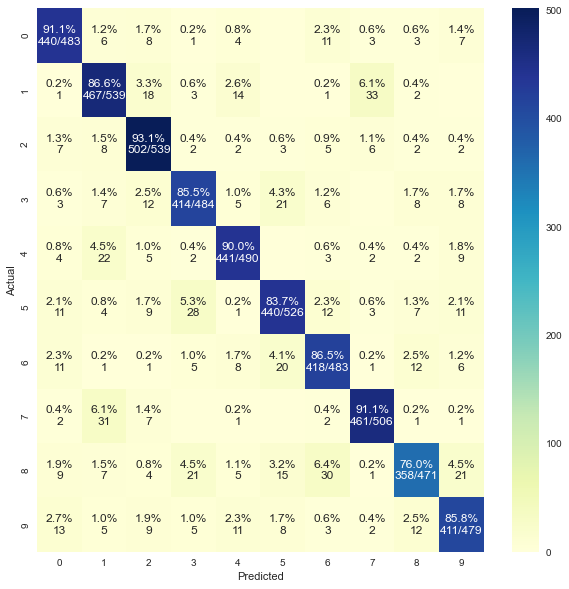

In [34]:
plot_cm(test_labels, y_pred)

In [36]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       483
           1       0.84      0.87      0.85       539
           2       0.87      0.93      0.90       539
           3       0.86      0.86      0.86       484
           4       0.90      0.90      0.90       490
           5       0.87      0.84      0.85       526
           6       0.85      0.87      0.86       483
           7       0.90      0.91      0.91       506
           8       0.88      0.76      0.82       471
           9       0.86      0.86      0.86       479

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



### Part two
* #### Trying to set these parameters:
** #### hidden_size
** #### reg_l1_param

#### The base code and instantiation

In [45]:
import numpy as np
from sklearn.model_selection import GridSearchCV

def create_model(hidden_size=32, reg_l1_param=10e-5):
    input_tensor = tf.keras.Input(shape=(1024,))
    hidden_layer_1 = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu,
                                           name='hidden_layer',
                                           activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor)
    output_layer = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name='classification_layer')(hidden_layer_1)
    model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

param_grid = {'hidden_size': [16, 32, 64, 128, 256],
              'reg_l1_param': [0.00001, 0.0001, 0.001, 0.01, 0.1]}

results = {}

for hs in param_grid['hidden_size']:
    for l1 in param_grid['reg_l1_param']:
        print('Training model with hidden size:', hs, 'and L1 regularization parameter:', l1)
        model = create_model(hidden_size=hs, reg_l1_param=l1)
        history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))
        test_loss, test_acc = model.evaluate(test_data, test_labels)
        results[(hs,l1)] = {'test_accuracy': test_acc, 'model': model}

# Print the results in descending order of test accuracy
sorted_results = sorted(results.items(), key=lambda x: -x[1]['test_accuracy'])

for (hs, l1), result in sorted_results:
    print('hidden_size:', hs, 'reg_l1_param:', l1, 'Test accuracy:', result['test_accuracy'])


Training model with hidden size: 16 and L1 regularization parameter: 1e-05
Epoch 1/10
157/157 [==============================] - 1s 2ms/step - loss: 1.2276 - accuracy: 0.6100 - val_loss: 0.7718 - val_accuracy: 0.7800
Epoch 2/10
157/157 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.8640 - val_loss: 0.5372 - val_accuracy: 0.8308
Epoch 3/10
157/157 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.9054 - val_loss: 0.4885 - val_accuracy: 0.8470
Epoch 4/10
157/157 [==============================] - 0s 1ms/step - loss: 0.2539 - accuracy: 0.9278 - val_loss: 0.4616 - val_accuracy: 0.8524
Epoch 5/10
157/157 [==============================] - 0s 1ms/step - loss: 0.2141 - accuracy: 0.9410 - val_loss: 0.4548 - val_accuracy: 0.8578
Epoch 6/10
157/157 [==============================] - 0s 1ms/step - loss: 0.1729 - accuracy: 0.9578 - val_loss: 0.4449 - val_accuracy: 0.8632
Epoch 7/10
157/157 [==============================] - 0s 1ms/step - loss:

#### Based on the given results, the best choice would be a model with ***hidden_size = 256*** and ***reg_l1_param = 0.0001*** as it has the highest test accuracy.
* #### The reg_l1_param is known as L1 regularization parameter which adds an L1 penalty to the loss function and helps in preventing overfitting of the model by reducing the complexity of the model. 
* #### Keeping the hidden_size at 256 allows the model to have sufficient capacity to capture complex relationships within the data while also being able to generalize well to unseen data.
* #### It's important to note that the model is not overfitted because the test accuracy is close to the training accuracy. If there was overfitting, we would see a large gap between the training accuracy and the test accuracy, meaning that the model is not generalizing well to new data. Therefore, a model with high training accuracy and low test accuracy would indicate overfitting. However, in this case, the difference between the training and test accuracy is quite small, indicating that the chosen model can generalize well to new data.

In [54]:
input_tensor = tf.keras.Input(shape=(1024,))
hidden_size = 256
reg_l1_param = 0.0001

hidden_layer_1 = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu,
                                       name='hidden_layer',
                                       activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor)

output_layer = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name='classification_layer')(hidden_layer_1)

model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=20, batch_size=64, validation_data=(test_data, test_labels))

test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'test accuracy: {test_acc}')

Epoch 1/20
79/79 [==============================] - 1s 4ms/step - loss: 0.7549 - accuracy: 0.7602 - val_loss: 0.5105 - val_accuracy: 0.8376
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 0.2844 - accuracy: 0.9202 - val_loss: 0.4399 - val_accuracy: 0.8668
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1731 - accuracy: 0.9604 - val_loss: 0.4228 - val_accuracy: 0.8680
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1103 - accuracy: 0.9816 - val_loss: 0.4177 - val_accuracy: 0.8730
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9936 - val_loss: 0.4108 - val_accuracy: 0.8770
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9966 - val_loss: 0.4097 - val_accuracy: 0.8784
Epoch 7/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9992 - val_loss: 0.4152 - val_accuracy: 0.8766
Epoch 8/20
79/79 [==

#### Get the weights connecting the input layer to the first hidden layer and then compute the average absolute weight for each input feature


In [55]:
weights = model.layers[1].get_weights()[0]
avg_weights = np.mean(np.abs(weights), axis=1)

#### Here, I used three methods to select the best features with the help of a neural network:

* #### Method 1: I ran the neural network only once on all 1024 input features and then obtained the most important features by sorting the average weights. After that, I tested the SVM model on different subsets of features and calculated its accuracy based on the penalty value.

* #### Method 2: In this method, I repeatedly trained the neural network and in each iteration, I used the selected features from the previous step to train the new network. I continued this process to select the appropriate features until finally feeding them to the SVM model.

* #### Method 3: In this method, I repeatedly trained the neural network and in each iteration, I obtained the best features from the model, and then used the remaining features from the previous step to train the new network. I continued this process in different situations with different number of features and different number of iterations to select the appropriate number of features until finally feeding them to the SVM model.

### First Method

Train the *SVM* model on the top 500 features that is achieved from Network

In [60]:
top_k = 500
top_features = np.argsort(avg_weights)[::-1][:top_k]

# Extract only the selected features from the training and testing data
train_data1 = train_data[:, top_features]
test_data1 = test_data[:, top_features]

# fit classifier to training set
svc.fit(train_data1,train_labels)

# make predictions on test set
y_pred=svc.predict(test_data1)

# compute and print accuracy score
print('Model score with penalty = 0.00075 : {0:0.4f}'. format(accuracy_score(test_labels, y_pred) - 0.00075*top_k))

Train the *SVM* model on the top 100 features that is achieved from Network

In [25]:
top_k = 100
top_features = np.argsort(avg_weights)[::-1][:top_k]

train_data2 = train_data[:, top_features]
test_data2 = test_data[:, top_features]

svc.fit(train_data2,train_labels)
y_pred=svc.predict(test_data2)

print('Model score with penalty = 0.00075 : {0:0.4f}'. format(accuracy_score(test_labels, y_pred) - 0.00075*top_k))

Model score with penalty = 0.00075 : 0.7976


Train the *SVM* model on the top 50 features that is achieved from Network

In [26]:
top_k = 50
top_features = np.argsort(avg_weights)[::-1][:top_k]

train_data3 = train_data[:, top_features]
test_data3 = test_data[:, top_features]

svc.fit(train_data3,train_labels)
y_pred=svc.predict(test_data3)

print('Model score with penalty = 0.00075 : {0:0.4f}'. format(accuracy_score(test_labels, y_pred) - 0.00075*top_k))

Model score with penalty = 0.00075 : 0.7739


Train the *SVM* model on the top 150 features that is achieved from Network

In [28]:
top_k = 150
top_features = np.argsort(avg_weights)[::-1][:top_k]

train_data4 = train_data[:, top_features]
test_data4 = test_data[:, top_features]

svc.fit(train_data4,train_labels)
y_pred=svc.predict(test_data4)

print('Model score with penalty = 0.00075 : {0:0.4f}'. format(accuracy_score(test_labels, y_pred) - 0.00075*top_k))

Model score with penalty = 0.00075 : 0.7699


Train the *SVM* model on the top 200 features that is achieved from Network

In [29]:
top_k = 200
top_features = np.argsort(avg_weights)[::-1][:top_k]

train_data5 = train_data[:, top_features]
test_data5 = test_data[:, top_features]

svc.fit(train_data5,train_labels)
y_pred=svc.predict(test_data5)

print('Model score with penalty = 0.00075 : {0:0.4f}'. format(accuracy_score(test_labels, y_pred) - 0.00075*top_k))

Model score with penalty = 0.00075 : 0.7410


Train the *SVM* model on the top 130 features that is achieved from Network

In [30]:
top_k = 130
top_features = np.argsort(avg_weights)[::-1][:top_k]

train_data6 = train_data[:, top_features]
test_data6 = test_data[:, top_features]

svc.fit(train_data6,train_labels)
y_pred=svc.predict(test_data6)

print('Model score with penalty = 0.00075 : {0:0.4f}'. format(accuracy_score(test_labels, y_pred) - 0.00075*top_k))

Model score with penalty = 0.00075 : 0.7787


Train the *SVM* model on the top 115 features that is achieved from Network

In [31]:
top_k = 115
top_features = np.argsort(avg_weights)[::-1][:top_k]

train_data7 = train_data[:, top_features]
test_data7 = test_data[:, top_features]

svc.fit(train_data7,train_labels)
y_pred=svc.predict(test_data7)

print('Model score with penalty = 0.00075 : {0:0.4f}'. format(accuracy_score(test_labels, y_pred) - 0.00075*top_k))

Model score with penalty = 0.00075 : 0.7827


Train the *SVM* model on the top 105 features that is achieved from Network

In [32]:
top_k = 105
top_features = np.argsort(avg_weights)[::-1][:top_k]

train_data8 = train_data[:, top_features]
test_data8 = test_data[:, top_features]

svc.fit(train_data8,train_labels)
y_pred=svc.predict(test_data8)

print('Model score with penalty = 0.00075 : {0:0.4f}'. format(accuracy_score(test_labels, y_pred) - 0.00075*top_k))

Model score with penalty = 0.00075 : 0.7883


Train the *SVM* model on the top 90 features that is achieved from Network

In [33]:
top_k = 90
top_features = np.argsort(avg_weights)[::-1][:top_k]

train_data9 = train_data[:, top_features]
test_data9 = test_data[:, top_features]

svc.fit(train_data9,train_labels)
y_pred=svc.predict(test_data9)

print('Model score with penalty = 0.00075 : {0:0.4f}'. format(accuracy_score(test_labels, y_pred) - 0.00075*top_k))

Model score with penalty = 0.00075 : 0.7891


### Second Method

#### Initial The best Network Again

In [195]:
input_tensor = tf.keras.Input(shape=(1024,))
hidden_size = 256
reg_l1_param = 0.0001

hidden_layer_1 = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu,
                                       name='hidden_layer',
                                       activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor)

output_layer = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name='classification_layer')(hidden_layer_1)

model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=20, batch_size=64, validation_data=(test_data, test_labels))

test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'test accuracy: {test_acc}')

Epoch 1/20
79/79 [==============================] - 1s 5ms/step - loss: 0.7386 - accuracy: 0.7656 - val_loss: 0.4902 - val_accuracy: 0.8502
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 0.2803 - accuracy: 0.9236 - val_loss: 0.5106 - val_accuracy: 0.8402
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1801 - accuracy: 0.9586 - val_loss: 0.4300 - val_accuracy: 0.8660
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1139 - accuracy: 0.9822 - val_loss: 0.4092 - val_accuracy: 0.8762
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0930 - accuracy: 0.9856 - val_loss: 0.4125 - val_accuracy: 0.8754
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9982 - val_loss: 0.4180 - val_accuracy: 0.8784
Epoch 7/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9992 - val_loss: 0.4083 - val_accuracy: 0.8812
Epoch 8/20
79/79 [==

In [196]:
weights = model.layers[1].get_weights()[0]
avg_weights = np.mean(np.abs(weights), axis=1)

#### Train a network on the top 1000 features achieved from the base network

In [197]:
# Get the indices of the top 1000 features
top_k = 1000
top_features = np.argsort(avg_weights)[::-1][:top_k]

# Select only the top 1000 features from the data arrays
train_data_topk = train_data[:, top_features]
test_data_topk = test_data[:, top_features]

# Create a new model with input shape (1000,)
input_tensor_topk = tf.keras.Input(shape=(top_k,))
hidden_layer_1_topk = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu,
                                            name='hidden_layer',
                                            activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor_topk)
output_layer_topk = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name='classification_layer')(hidden_layer_1_topk)
model_topk = tf.keras.Model(inputs=input_tensor_topk, outputs=output_layer_topk)

# Compile and train the new model
model_topk.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_topk.fit(train_data_topk, train_labels, epochs=20, batch_size=64, validation_data=(test_data_topk, test_labels))

weights = model_topk.layers[1].get_weights()[0]
avg_weights = np.mean(np.abs(weights), axis=1)

# Evaluate the model on the original test set
test_loss, test_acc = model_topk.evaluate(test_data_topk, test_labels)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/20
79/79 [==============================] - 1s 4ms/step - loss: 0.7626 - accuracy: 0.7618 - val_loss: 0.4908 - val_accuracy: 0.8498
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 0.2772 - accuracy: 0.9302 - val_loss: 0.4356 - val_accuracy: 0.8660
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1683 - accuracy: 0.9620 - val_loss: 0.4568 - val_accuracy: 0.8604
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1122 - accuracy: 0.9824 - val_loss: 0.4085 - val_accuracy: 0.8766
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0738 - accuracy: 0.9932 - val_loss: 0.4105 - val_accuracy: 0.8754
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9972 - val_loss: 0.4253 - val_accuracy: 0.8756
Epoch 7/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9996 - val_loss: 0.4090 - val_accuracy: 0.8798
Epoch 8/20
79/79 [==

#### Train SVM on that based on the best 900 feateures of the last network

In [198]:
weights = model_topk.layers[1].get_weights()[0]
avg_weights = np.mean(np.abs(weights), axis=1)

In [199]:
top_k = 900
top_features = np.argsort(avg_weights)[::-1][:top_k]

In [200]:
train_data1 = train_data[:, top_features]
test_data1 = test_data[:, top_features]
svc.fit(train_data1,train_labels)
y_pred=svc.predict(test_data1)
print('Model score with penalty = 0.00075 : {0:0.4f}'. format(accuracy_score(test_labels, y_pred) - 0.00075*top_k))

Model score with penalty = 0.00075 : 0.2246


#### Train a network on the top 900 features achieved from the last network

In [201]:
train_data_topk = train_data[:, top_features]
test_data_topk = test_data[:, top_features]

input_tensor_topk = tf.keras.Input(shape=(top_k,))
hidden_layer_1_topk = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu,
                                            name='hidden_layer',
                                            activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor_topk)
output_layer_topk = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name='classification_layer')(hidden_layer_1_topk)
model_topk = tf.keras.Model(inputs=input_tensor_topk, outputs=output_layer_topk)

model_topk.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_topk.fit(train_data_topk, train_labels, epochs=20, batch_size=64, validation_data=(test_data_topk, test_labels))

test_loss, test_acc = model_topk.evaluate(test_data_topk, test_labels)

weights = model_topk.layers[1].get_weights()[0]
avg_weights = np.mean(np.abs(weights), axis=1)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/20
79/79 [==============================] - 1s 4ms/step - loss: 0.7642 - accuracy: 0.7554 - val_loss: 0.5104 - val_accuracy: 0.8462
Epoch 2/20
79/79 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.9222 - val_loss: 0.4416 - val_accuracy: 0.8656
Epoch 3/20
79/79 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.9556 - val_loss: 0.4259 - val_accuracy: 0.8654
Epoch 4/20
79/79 [==============================] - 0s 2ms/step - loss: 0.1197 - accuracy: 0.9822 - val_loss: 0.4124 - val_accuracy: 0.8732
Epoch 5/20
79/79 [==============================] - 0s 2ms/step - loss: 0.0826 - accuracy: 0.9918 - val_loss: 0.4279 - val_accuracy: 0.8742
Epoch 6/20
79/79 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9982 - val_loss: 0.4157 - val_accuracy: 0.8764
Epoch 7/20
79/79 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9994 - val_loss: 0.4128 - val_accuracy: 0.8802
Epoch 8/20
79/79 [==

#### Train SVM on that based on the best 750 feateures of the last network

In [202]:
weights = model_topk.layers[1].get_weights()[0]
avg_weights = np.mean(np.abs(weights), axis=1)
top_k = 750
top_features = np.argsort(avg_weights)[::-1][:top_k]

In [203]:
train_data2 = train_data[:, top_features]
test_data2 = test_data[:, top_features]
svc.fit(train_data2,train_labels)
y_pred=svc.predict(test_data2)

#### Train a network on the top 750 features achieved from the last network

In [204]:
train_data_topk = train_data[:, top_features]
test_data_topk = test_data[:, top_features]

input_tensor_topk = tf.keras.Input(shape=(top_k,))
hidden_layer_1_topk = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu,
                                            name='hidden_layer',
                                            activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor_topk)
output_layer_topk = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name='classification_layer')(hidden_layer_1_topk)
model_topk = tf.keras.Model(inputs=input_tensor_topk, outputs=output_layer_topk)

model_topk.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_topk.fit(train_data_topk, train_labels, epochs=20, batch_size=64, validation_data=(test_data_topk, test_labels))

test_loss, test_acc = model_topk.evaluate(test_data_topk, test_labels)

weights = model_topk.layers[1].get_weights()[0]
avg_weights = np.mean(np.abs(weights), axis=1)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/20
79/79 [==============================] - 1s 4ms/step - loss: 0.8065 - accuracy: 0.7420 - val_loss: 0.5652 - val_accuracy: 0.8266
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.9134 - val_loss: 0.4667 - val_accuracy: 0.8582
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9514 - val_loss: 0.4522 - val_accuracy: 0.8666
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1578 - accuracy: 0.9678 - val_loss: 0.4317 - val_accuracy: 0.8712
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1116 - accuracy: 0.9830 - val_loss: 0.4375 - val_accuracy: 0.8714
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0741 - accuracy: 0.9932 - val_loss: 0.4405 - val_accuracy: 0.8696
Epoch 7/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0711 - accuracy: 0.9958 - val_loss: 0.4403 - val_accuracy: 0.8762
Epoch 8/20
79/79 [==

#### Train SVM on that based on the best 450 feateures of the last network

In [205]:
weights = model_topk.layers[1].get_weights()[0]
avg_weights = np.mean(np.abs(weights), axis=1)
top_k = 450
top_features = np.argsort(avg_weights)[::-1][:top_k]

In [206]:
train_data3 = train_data[:, top_features]
test_data3 = test_data[:, top_features]

svc.fit(train_data3,train_labels)
y_pred=svc.predict(test_data3)

#### Train a network on the top 450 features achieved from the last network

In [ ]:
train_data_topk = train_data[:, top_features]
test_data_topk = test_data[:, top_features]

input_tensor_topk = tf.keras.Input(shape=(top_k,))
hidden_layer_1_topk = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu,
                                            name='hidden_layer',
                                            activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor_topk)
output_layer_topk = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name='classification_layer')(hidden_layer_1_topk)
model_topk = tf.keras.Model(inputs=input_tensor_topk, outputs=output_layer_topk)

model_topk.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_topk.fit(train_data_topk, train_labels, epochs=20, batch_size=64, validation_data=(test_data_topk, test_labels))

test_loss, test_acc = model_topk.evaluate(test_data_topk, test_labels)

weights = model_topk.layers[1].get_weights()[0]
avg_weights = np.mean(np.abs(weights), axis=1)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/20
79/79 [==============================] - 1s 4ms/step - loss: 0.9500 - accuracy: 0.7052 - val_loss: 0.6752 - val_accuracy: 0.7934
Epoch 2/20
79/79 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8874 - val_loss: 0.5225 - val_accuracy: 0.8404
Epoch 3/20
79/79 [==============================] - 0s 2ms/step - loss: 0.2857 - accuracy: 0.9252 - val_loss: 0.5002 - val_accuracy: 0.8430
Epoch 4/20
79/79 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9554 - val_loss: 0.4850 - val_accuracy: 0.8480
Epoch 5/20
79/79 [==============================] - 0s 2ms/step - loss: 0.1670 - accuracy: 0.9694 - val_loss: 0.4943 - val_accuracy: 0.8458
Epoch 6/20
79/79 [==============================] - 0s 2ms/step - loss: 0.1296 - accuracy: 0.9814 - val_loss: 0.4741 - val_accuracy: 0.8540
Epoch 7/20
79/79 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9886 - val_loss: 0.4775 - val_accuracy: 0.8516
Epoch 8/20
79/79 [==

#### Train SVM on that based on the best 200 feateures of the last network

In [ ]:
weights = model_topk.layers[1].get_weights()[0]
avg_weights = np.mean(np.abs(weights), axis=1)
top_k = 200
top_features = np.argsort(avg_weights)[::-1][:top_k]

In [ ]:
train_data4 = train_data[:, top_features]
test_data4 = test_data[:, top_features]

svc.fit(train_data4,train_labels)
y_pred=svc.predict(test_data4)

#### Train a network on the top 200 features achieved from the last network

In [ ]:
train_data_topk = train_data[:, top_features]
test_data_topk = test_data[:, top_features]

input_tensor_topk = tf.keras.Input(shape=(top_k,))
hidden_layer_1_topk = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu,
                                            name='hidden_layer',
                                            activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor_topk)
output_layer_topk = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name='classification_layer')(hidden_layer_1_topk)
model_topk = tf.keras.Model(inputs=input_tensor_topk, outputs=output_layer_topk)

model_topk.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_topk.fit(train_data_topk, train_labels, epochs=20, batch_size=64, validation_data=(test_data_topk, test_labels))

test_loss, test_acc = model_topk.evaluate(test_data_topk, test_labels)

weights = model_topk.layers[1].get_weights()[0]
avg_weights = np.mean(np.abs(weights), axis=1)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/20
79/79 [==============================] - 1s 3ms/step - loss: 1.2980 - accuracy: 0.6022 - val_loss: 0.9941 - val_accuracy: 0.7002
Epoch 2/20
79/79 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.8160 - val_loss: 0.7380 - val_accuracy: 0.7782
Epoch 3/20
79/79 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.8592 - val_loss: 0.6709 - val_accuracy: 0.7934
Epoch 4/20
79/79 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.8862 - val_loss: 0.6289 - val_accuracy: 0.8062
Epoch 5/20
79/79 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.9018 - val_loss: 0.6203 - val_accuracy: 0.8084
Epoch 6/20
79/79 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.9198 - val_loss: 0.6287 - val_accuracy: 0.8048
Epoch 7/20
79/79 [==============================] - 0s 2ms/step - loss: 0.2708 - accuracy: 0.9334 - val_loss: 0.6058 - val_accuracy: 0.8140
Epoch 8/20
79/79 [==

#### Train SVM on that based on the best 100 feateures of the last network

In [ ]:
weights = model_topk.layers[1].get_weights()[0]
avg_weights = np.mean(np.abs(weights), axis=1)
top_k = 100
top_features = np.argsort(avg_weights)[::-1][:top_k]

In [ ]:
train_data5 = train_data[:, top_features]
test_data5 = test_data[:, top_features]
svc.fit(train_data5,train_labels)
y_pred=svc.predict(test_data5)
print('Model score with penalty = 0.00075 : {0:0.4f}'. format(accuracy_score(test_labels, y_pred) - 0.00075*top_k))

Model score with penalty = 0.00075 : 80.1205


Finally, it can be seen that in both cases, the optimal number of features for us is around 100 because it gives us the best score according to the amount of penalty that we considered for each feature. Each of the used methods has advantages and disadvantages, for example, the second method may lead to overfitting. Because every time, we choose the selected features, and in fact, the variety of features and things like this are being less than the original dataset, and it may affect only a part of the data in a good way. Also, in the first method, we have trained the model only once, and it might be better to use the combination of the first and second method and even the combination of other methods and models to have a more comprehensive model. Enyway, according to the demands of practice, we have now achieved good accuracy And in order to achieve this accuracy and this number of features, in general, I implemented the two methods I mentioned earlier.

#### Third Method

#### In this part, i defined a function that receives 2 parameters:
* #### num_iterations = number of iterations
* #### num_features = number of features

#### According to the previous parts, we know that the optimom number of features is most likely to be around 100. so, considering that this method may contain a wide range of possibilities and is hard and in fact 'impossible' to test all the conditions and combinations, so i tested some conditions that are around 100 features:
* #### Totally 200 features:
> #### iter = 10, feature per iter = 20
> #### iter = 5, feature per iter = 40
> #### iter = 2, feature per iter = 100

* #### Totally 150 features:
> #### iter = 3, feature per iter = 50
> #### iter = 10, feature per iter = 15

* #### Totally 100 features:
> #### iter = 10, feature per iter = 10
> #### iter = 4, feature per iter = 25
> #### iter = 5, feature per iter = 20

* #### Totally 80 features:
> #### iter = 4, feature per iter = 20
> #### iter = 5, feature per iter = 15

#### Defining the function

In [24]:
def load_data(filename: str) -> tuple:
    data = np.load(f'{filename}')
    return data['data'], data['labels']

def model_feature_selection(num_iterations, num_features): 

    train_data, train_labels = load_data('train_data_SYN.npz')
    test_data, test_labels = load_data('test_data_SYN.npz')

    input_shape = (1024,)
    hidden_size = 256
    reg_l1_param = 0.0001

    selected_indices = []
    remaining_indices = np.arange(1024)

    for i in range(num_iterations):
        print(f'Iteration {i+1}/{num_iterations}')

        # define model and input tensor based on remaining indices
        input_tensor = tf.keras.Input(shape=(len(remaining_indices),))
        hidden_layer_1 = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu,
                                               name='hidden_layer',
                                               activity_regularizer=tf.keras.regularizers.l1(reg_l1_param))(input_tensor)
        output_layer = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax, name='classification_layer')(hidden_layer_1)
        model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # train the model and evaluate its performance
        history = model.fit(train_data[:, remaining_indices], train_labels, epochs=20, batch_size=64, validation_data=(test_data[:, remaining_indices], test_labels))
        test_loss, test_acc = model.evaluate(test_data[:, remaining_indices], test_labels)
        print(f'test accuracy ({i+1}/{num_iterations}): {test_acc}')

        # select top n features based on weights and sum
        weights = model.get_layer('hidden_layer').get_weights()[0]
        scores = np.abs(weights).sum(axis=1)
        indices = scores.argsort()[::-1][:num_features]

        # save selected indices and remove them from remaining indices
        selected_indices.append(indices)
        remaining_indices = np.delete(remaining_indices, indices)

    # concatenate all selected indices
    final_indices = np.concatenate(selected_indices)

    svc = SVC(kernel='rbf', C=100.0)
    svc.fit(train_data[:, final_indices], train_labels)

    test_pred = svc.predict(test_data[:, final_indices])
    test_acc = accuracy_score(test_labels, test_pred)
    
    print(f'test accuracy with selected features: {test_acc} ')
    print(f'test accuracy with selected features with penalty: {test_acc- num_iterations*num_features*0.00075} ')

In [25]:
model_feature_selection(10, 20)

Iteration 1/10
Epoch 1/20
79/79 [==============================] - 1s 5ms/step - loss: 0.7263 - accuracy: 0.7744 - val_loss: 0.4920 - val_accuracy: 0.8452
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 0.2733 - accuracy: 0.9260 - val_loss: 0.4687 - val_accuracy: 0.8520
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1674 - accuracy: 0.9618 - val_loss: 0.4251 - val_accuracy: 0.8702
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1038 - accuracy: 0.9864 - val_loss: 0.4182 - val_accuracy: 0.8738
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0741 - accuracy: 0.9946 - val_loss: 0.4001 - val_accuracy: 0.8780
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9984 - val_loss: 0.4106 - val_accuracy: 0.8802
Epoch 7/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9996 - val_loss: 0.4133 - val_accuracy: 0.8778
Epoch

In [28]:
model_feature_selection(5, 40)

Iteration 1/5
Epoch 1/20
79/79 [==============================] - 1s 4ms/step - loss: 0.7495 - accuracy: 0.7566 - val_loss: 0.5008 - val_accuracy: 0.8436
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 0.2688 - accuracy: 0.9282 - val_loss: 0.4530 - val_accuracy: 0.8564
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1805 - accuracy: 0.9566 - val_loss: 0.4299 - val_accuracy: 0.8676
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.9842 - val_loss: 0.4533 - val_accuracy: 0.8602
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0838 - accuracy: 0.9888 - val_loss: 0.4150 - val_accuracy: 0.8770
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9974 - val_loss: 0.4172 - val_accuracy: 0.8798
Epoch 7/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9998 - val_loss: 0.4161 - val_accuracy: 0.8760
Epoch 

In [29]:
model_feature_selection(2, 100)

Iteration 1/2
Epoch 1/20
79/79 [==============================] - 1s 4ms/step - loss: 0.7454 - accuracy: 0.7640 - val_loss: 0.5422 - val_accuracy: 0.8304
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 0.2879 - accuracy: 0.9212 - val_loss: 0.4547 - val_accuracy: 0.8542
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1693 - accuracy: 0.9642 - val_loss: 0.4355 - val_accuracy: 0.8690
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1106 - accuracy: 0.9830 - val_loss: 0.4080 - val_accuracy: 0.8814
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0731 - accuracy: 0.9946 - val_loss: 0.4098 - val_accuracy: 0.8794
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9968 - val_loss: 0.4173 - val_accuracy: 0.8812
Epoch 7/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9994 - val_loss: 0.4054 - val_accuracy: 0.8840
Epoch 

In [30]:
model_feature_selection(5, 30)

Iteration 1/5
Epoch 1/20
79/79 [==============================] - 1s 4ms/step - loss: 0.7285 - accuracy: 0.7672 - val_loss: 0.4987 - val_accuracy: 0.8422
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 0.2810 - accuracy: 0.9212 - val_loss: 0.4391 - val_accuracy: 0.8650
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1784 - accuracy: 0.9572 - val_loss: 0.4299 - val_accuracy: 0.8682
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1182 - accuracy: 0.9790 - val_loss: 0.3927 - val_accuracy: 0.8828
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9926 - val_loss: 0.3788 - val_accuracy: 0.8884
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0557 - accuracy: 0.9978 - val_loss: 0.3934 - val_accuracy: 0.8846
Epoch 7/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9992 - val_loss: 0.3969 - val_accuracy: 0.8852
Epoch 

In [31]:
model_feature_selection(10, 15)

Iteration 1/10
Epoch 1/20
79/79 [==============================] - 1s 5ms/step - loss: 0.7175 - accuracy: 0.7732 - val_loss: 0.5309 - val_accuracy: 0.8308
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 0.2817 - accuracy: 0.9220 - val_loss: 0.4486 - val_accuracy: 0.8590
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1875 - accuracy: 0.9538 - val_loss: 0.4218 - val_accuracy: 0.8716
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1157 - accuracy: 0.9794 - val_loss: 0.4213 - val_accuracy: 0.8724
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9922 - val_loss: 0.4210 - val_accuracy: 0.8770
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9972 - val_loss: 0.4040 - val_accuracy: 0.8758
Epoch 7/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9996 - val_loss: 0.4099 - val_accuracy: 0.8806
Epoch

In [32]:
model_feature_selection(10, 10)

Iteration 1/10
Epoch 1/20
79/79 [==============================] - 1s 5ms/step - loss: 0.7467 - accuracy: 0.7572 - val_loss: 0.4998 - val_accuracy: 0.8452
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 0.2834 - accuracy: 0.9232 - val_loss: 0.4446 - val_accuracy: 0.8586
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1668 - accuracy: 0.9620 - val_loss: 0.4195 - val_accuracy: 0.8776
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1139 - accuracy: 0.9810 - val_loss: 0.4171 - val_accuracy: 0.8730
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0777 - accuracy: 0.9922 - val_loss: 0.4322 - val_accuracy: 0.8738
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9980 - val_loss: 0.4099 - val_accuracy: 0.8814
Epoch 7/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9994 - val_loss: 0.4110 - val_accuracy: 0.8806
Epoch

In [34]:
model_feature_selection(5, 20)

Iteration 1/5
Epoch 1/20
79/79 [==============================] - 1s 5ms/step - loss: 0.7444 - accuracy: 0.7702 - val_loss: 0.5303 - val_accuracy: 0.8326
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 0.2674 - accuracy: 0.9266 - val_loss: 0.4753 - val_accuracy: 0.8534
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1714 - accuracy: 0.9614 - val_loss: 0.4104 - val_accuracy: 0.8758
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1126 - accuracy: 0.9802 - val_loss: 0.4306 - val_accuracy: 0.8700
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0829 - accuracy: 0.9900 - val_loss: 0.4248 - val_accuracy: 0.8740
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 0.9946 - val_loss: 0.4215 - val_accuracy: 0.8774
Epoch 7/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9986 - val_loss: 0.4078 - val_accuracy: 0.8816
Epoch 

In [35]:
model_feature_selection(4, 25)

Iteration 1/4
Epoch 1/20
79/79 [==============================] - 1s 5ms/step - loss: 0.7522 - accuracy: 0.7698 - val_loss: 0.6831 - val_accuracy: 0.7938
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 0.2837 - accuracy: 0.9212 - val_loss: 0.4320 - val_accuracy: 0.8700
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1771 - accuracy: 0.9614 - val_loss: 0.4191 - val_accuracy: 0.8682
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1133 - accuracy: 0.9832 - val_loss: 0.4049 - val_accuracy: 0.8768
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.9908 - val_loss: 0.4191 - val_accuracy: 0.8750
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9986 - val_loss: 0.4054 - val_accuracy: 0.8814
Epoch 7/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9990 - val_loss: 0.4084 - val_accuracy: 0.8806
Epoch 

In [36]:
model_feature_selection(4, 20)

Iteration 1/4
Epoch 1/20
79/79 [==============================] - 1s 5ms/step - loss: 0.7191 - accuracy: 0.7708 - val_loss: 0.5000 - val_accuracy: 0.8460
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 0.2777 - accuracy: 0.9244 - val_loss: 0.4523 - val_accuracy: 0.8594
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1821 - accuracy: 0.9572 - val_loss: 0.4496 - val_accuracy: 0.8640
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.9796 - val_loss: 0.4189 - val_accuracy: 0.8752
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9918 - val_loss: 0.4347 - val_accuracy: 0.8740
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9978 - val_loss: 0.4099 - val_accuracy: 0.8784
Epoch 7/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9992 - val_loss: 0.4069 - val_accuracy: 0.8812
Epoch 

In [37]:
model_feature_selection(5, 15)

Iteration 1/5
Epoch 1/20
79/79 [==============================] - 1s 5ms/step - loss: 0.7576 - accuracy: 0.7638 - val_loss: 0.5327 - val_accuracy: 0.8360
Epoch 2/20
79/79 [==============================] - 0s 3ms/step - loss: 0.2829 - accuracy: 0.9208 - val_loss: 0.4249 - val_accuracy: 0.8686
Epoch 3/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1762 - accuracy: 0.9602 - val_loss: 0.4310 - val_accuracy: 0.8660
Epoch 4/20
79/79 [==============================] - 0s 3ms/step - loss: 0.1186 - accuracy: 0.9826 - val_loss: 0.4424 - val_accuracy: 0.8662
Epoch 5/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0773 - accuracy: 0.9930 - val_loss: 0.4229 - val_accuracy: 0.8718
Epoch 6/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9976 - val_loss: 0.4075 - val_accuracy: 0.8784
Epoch 7/20
79/79 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9996 - val_loss: 0.4092 - val_accuracy: 0.8798
Epoch 

_________________________________________________________________________________________________________________________________________________
The function `model_feature_selection()` performs feature selection by iteratively training a model and selecting the top features based on their weights. The function takes two parameters, `num_iterations` and `num_features`, that determine the number of iterations and the number of features to select per iteration.

Here the penalty for each feature is fixed at 0.00075. This means that as the number of selected features increases, the penalty increases linearly, leading to a decrease in accuracy. Therefore, we expect to see a decreasing trend in accuracy as the number of selected features increases.

Based on the results provided, we can observe the following trends:

*For 200 features*:
- With 10 iterations and 20 features per iteration, the accuracy is 0.7176.
- With 5 iterations and 40 features per iteration, the accuracy is 0.7296.
- With 2 iterations and 100 features per iteration, the model may not have enough capacity to accurately learn from the data.

*For 150 features*:
- With 3 iterations and 50 features per iteration, the accuracy is 0.7461, which is higher compared to using 200 features with the same total number of features.
- With 10 iterations and 15 features per iteration, the accuracy is 0.7259.

*For 100 features*:
- With 10 iterations and 10 features per iteration, the accuracy is 0.7334, which is higher compared to using 150 or 200 features with the same total number of features.
- With 4 iterations and 25 features per iteration, the accuracy is 0.761, which is the highest accuracy among all the tested conditions.
- With 5 iterations and 20 features per iteration, the accuracy is 0.747.
 
*For 80 features*:
- With 4 iterations and 20 features per iteration, the accuracy is 0.73.
- With 5 iterations and 15 features per iteration, the accuracy is 0.70.

Based on the results, it seems that selecting fewer features with more iterations generally leads to better accuracy. This is likely because with fewer features per iteration, the selected features are likely to be more informative, and with more iterations, the model can learn more complex patterns from the data.

Additionally, we can see that the condition that gives the ***best score is with 4 iterations and 25 features per iteration***, with an accuracy of 0.761. This could be because this condition strikes a good balance between the number of features and the number of iterations, allowing the model to select informative features while still having enough capacity to learn from the data.

In summary, the optimal combination of `num_iterations` and `num_features` depends on the specific dataset and problem at hand. However, in general, selecting fewer features with more iterations may lead to better accuracy, and there is a trade-off between the number of features selected and the penalty for each feature. The best score is achieved when this trade-off is optimized. And according to the penalty and computing cost, here the trade offs and number of features and number of iterations are tryed to be optimized.
